## Final Project Submission

Please fill out:
* Student name: MAGEMBE BRIAN NYAMBANE
* Student pace:  full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# 1. Business Understanding

### 1.1 Understanding the problem

Here, a data scientist's responsibility is to find out what factors are most likely to have an impact on home prices. They also look closely at how the variables affect home prices and how much they will impact the stakeholders in the housing market. This is really important because before real estate investors make a decision, they need think about whether the investment will be profitable or not. Data scientists are consequently required to conduct important evaluations and analyses to identify the crucial variables and their influence on investment decisions. Instead of repeatedly going through the process, after careful study, a predictive model that will be utilized to assist new investors entering the market should be constructed.

# 1.2 Problem Statement

The problem of this study is to uncover the factors that affect pricing and how they affect housing prices. Once the factors influencing house prices are identified, then they are examined how they influence pricing of house.

# 2. Data Understanding

# 2.1 Data collection 

Secondary data from King County House Sales has been employed to be used in this project as "kc_house_data.scv".

In [2]:
#loading data 
import pandas as pd
data = pd.read_csv("kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# 2.2 Data Description

# Column Names and Descriptions for King County Data Set
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website]
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors

## 2.3 Sampling Strategy

### 2.3.1 Target Population

The target population for this project is both the stakeholders and the people living within King County. This is because before stakeholders make a decision to invest in a housing project, they will consider the factors that influence the pricing of houses. also the people, because before they rent houses, they will always consider why the house's price should cost so much.

### 2.3.2 Sampling Method

This data is based on datasets from King County house sales that contain multiple columns (variables). Of these columns, only those that are highly correlated to the prices of the houses are the ones that are going to be used, and only those that sound theoretically significant are going to be used. This is where the role of a data scientist starts to dwell, and he is the one to think critically about what variables are going to be of interest and essence. The target population for this project is both the stakeholders and the people living within King County. This is because before stakeholders make a decision to invest in a housing project, they will consider the factors that influence the pricing of houses. also the people, because before they rent houses, they will always consider why the house's price should cost so much.

### 2.4  Specifying the Question
This part describes the null hypothesis and alternative hypothesis:

Ho: all the factors have the same effect.

H1: all the factors does not have the same effect.

## 3. Data Exploration

In [267]:
# explaring data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [268]:
# data shape
data.shape

(21597, 21)

In [269]:
# summary statistics
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [270]:
# checking for missing values
data.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [271]:
# checking for duplicates
data.duplicated().sum()

0

In [272]:
# shape 
data.shape

(21597, 21)

In [273]:
# counts in condition
data["condition"].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [274]:
# importing necessary library packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [275]:
# feature engineering
data["date"] = pd.to_datetime\
                (data["date"])

In [276]:
data["month"] = pd.DatetimeIndex(data["date"]).month

In [277]:
# displaying first 5 rows
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2


# checking for linear regression assumptions in the data
This helps to know if our data is suitable for modelling using  linear regression

In [278]:
# data that contain variables of interest
#"price","bathrooms","sqft_living","sqft_living15","sqft_above","sqft_lot","sqft_lot15",
data.drop(["bedrooms","grade","month"],axis = 1,inplace = True)

In [279]:
data

,id,date,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,1.00,1180,5650,1.0,NaN,NONE,Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,2.25,2570,7242,2.0,NO,NONE,Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,1.00,770,10000,1.0,NO,NONE,Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,3.00,1960,5000,1.0,NO,NONE,Very Good,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,2.00,1680,8080,1.0,NO,NONE,Average,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,2.50,1530,1131,3.0,NO,NONE,Average,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2015-02-23,400000.0,2.50,2310,5813,2.0,NO,NONE,Average,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,2014-06-23,402101.0,0.75,1020,1350,2.0,NO,NONE,Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,2015-01-16,400000.0,2.50,1600,2388,2.0,NaN,NONE,Average,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [280]:
# checking for missing values
data.isna().sum()

id                  0
date                0
price               0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [283]:
# checking if our data is correlated(multicollinearity)
print(data.corr())
explanation = ('''
From our output it is very clear that our data has no multicollinearity.
This is because data is said to have multicollinearity if it is greater than 75%

''')
print(explanation)

                     id     price  bathrooms  sqft_living  sqft_lot    floors  \
id             1.000000 -0.016772   0.005162    -0.012241 -0.131911  0.018608   
price         -0.016772  1.000000   0.525906     0.701917  0.089876  0.256804   
bathrooms      0.005162  0.525906   1.000000     0.755758  0.088373  0.502582   
sqft_living   -0.012241  0.701917   0.755758     1.000000  0.173453  0.353953   
sqft_lot      -0.131911  0.089876   0.088373     0.173453  1.000000 -0.004814   
floors         0.018608  0.256804   0.502582     0.353953 -0.004814  1.000000   
sqft_above    -0.010799  0.605368   0.686668     0.876448  0.184139  0.523989   
yr_built       0.021617  0.053953   0.507173     0.318152  0.052946  0.489193   
yr_renovated  -0.012010  0.129599   0.051050     0.055660  0.004513  0.003535   
zipcode       -0.008211 -0.053402  -0.204786    -0.199802 -0.129586 -0.059541   
lat           -0.001798  0.306692   0.024280     0.052155 -0.085514  0.049239   
long           0.020672  0.0

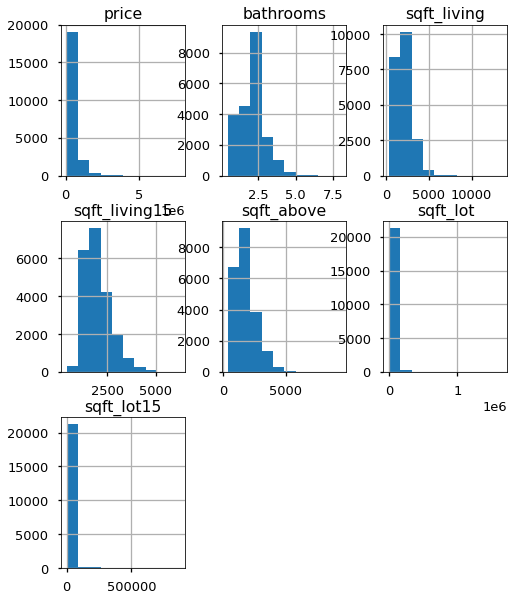

In [285]:
# testing normality in our  variables
data[["price","bathrooms","condition","sqft_living","sqft_living15","sqft_above","sqft_lot","sqft_lot15",]]\
    .hist(figsize=(8, 10));

From our output,it shows that our data is not normally distributed except sqft_lot15 which is fairly normal

### Since the data is not normally distributed, it should be transformed

In [288]:
#transforming new data to normal data distribution
#removing warnings message
import warnings
warnings.filterwarnings("ignore")
new_data_norm = np.log(data[['price','sqft_living','sqft_living15','sqft_above','sqft_lot','sqft_lot15']])
new_data_norm.head()
                                                                                                          

,price,sqft_living,sqft_living15,sqft_above,sqft_lot,sqft_lot15
0,12.309982,7.073270,7.200425,7.073270,8.639411,8.639411
1,13.195614,7.851661,7.432484,7.682482,8.887653,8.941022
2,12.100712,6.646391,7.908387,6.646391,9.210340,8.994917
3,13.311329,7.580700,7.215240,6.956545,8.517193,8.517193
4,13.142166,7.426549,7.495542,7.426549,8.997147,8.923058


In [289]:
# checking for missing values
new_data_norm.isna().sum()

price            0
sqft_living      0
sqft_living15    0
sqft_above       0
sqft_lot         0
sqft_lot15       0
dtype: int64

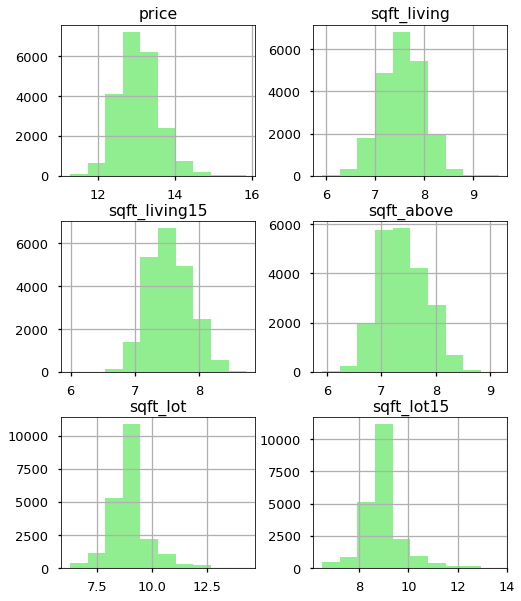

In [290]:
# visualization normality in transformed data
new_data_norm[["price","sqft_living","sqft_living15","sqft_above","sqft_lot","sqft_lot15"]]\
   .hist(figsize=(8, 10),color = "lightgreen");

In [293]:
# checking shape
new_data_norm.shape

(21597, 6)

In [294]:
# checking for data types
new_data_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   sqft_living    21597 non-null  float64
 2   sqft_living15  21597 non-null  float64
 3   sqft_above     21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   sqft_lot15     21597 non-null  float64
dtypes: float64(6)
memory usage: 1012.5 KB


## Exploring transformed data

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

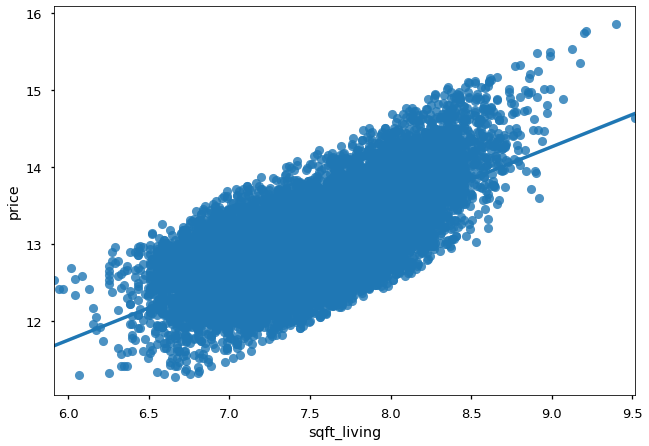

In [295]:
sns.regplot(x='sqft_living',y='price',data=new_data_norm)

<AxesSubplot:xlabel='sqft_living15', ylabel='price'>

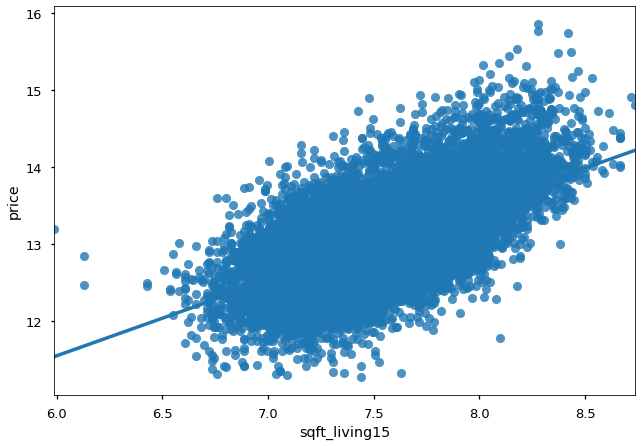

In [296]:
sns.regplot(x='sqft_living15',y='price',data=new_data_norm)

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

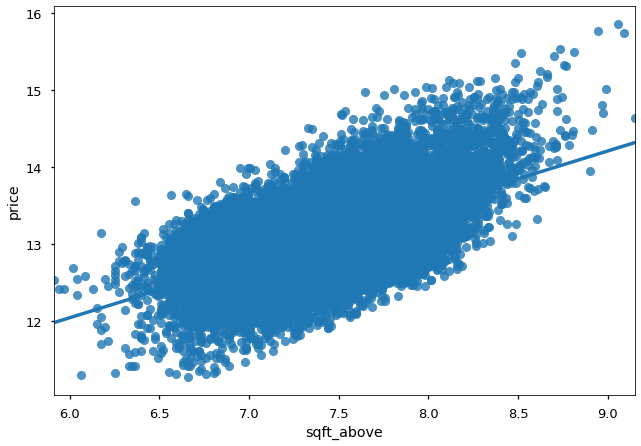

In [297]:
sns.regplot(x='sqft_above',y='price',data=new_data_norm)

# 4. Data Analysis

# Building a baseline Simple Linear Regression Model

In [298]:
print(new_data_norm)

           price  sqft_living  sqft_living15  sqft_above  sqft_lot  sqft_lot15
0      12.309982     7.073270       7.200425    7.073270  8.639411    8.639411
1      13.195614     7.851661       7.432484    7.682482  8.887653    8.941022
2      12.100712     6.646391       7.908387    6.646391  9.210340    8.994917
3      13.311329     7.580700       7.215240    6.956545  8.517193    8.517193
4      13.142166     7.426549       7.495542    7.426549  8.997147    8.923058
...          ...          ...            ...         ...       ...         ...
21592  12.793859     7.333023       7.333023    7.333023  7.030857    7.319202
21593  12.899220     7.745003       7.512071    7.745003  8.667852    8.881836
21594  12.904459     6.927558       6.927558    6.927558  7.207860    7.604396
21595  12.899220     7.377759       7.251345    7.377759  7.778211    7.160069
21596  12.691580     6.927558       6.927558    6.927558  6.981006    7.213032

[21597 rows x 6 columns]


correlation helps to find the variables of interest which can help us come up with meaningful insights
* variables of interest to be put under investigation are normally distributed variables 
       price
       sqft_living = 0.6748
       sqft_living15 =  0.6072
       sqft_above = 0.5860
       sqft_lot =  0.1383
       

From the provided outputs sqft_living15_norm is the most highly correlated therefore it is a baseline.

In [299]:
# defining highly correlated variable
highly_correlated = new_data_norm["sqft_living"]

### plotting the predictor vs price 

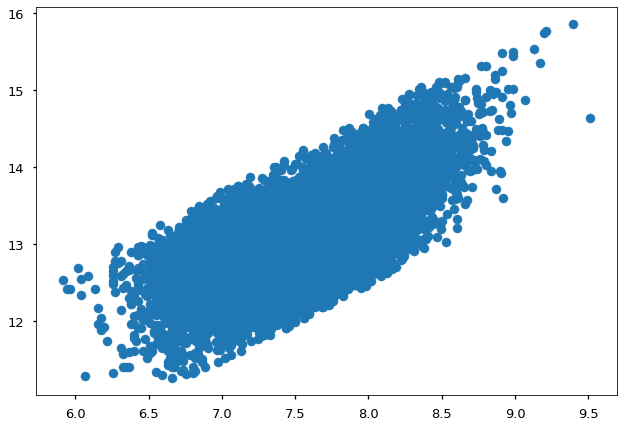

In [300]:
# plotting most correlated vs price
plt.scatter(highly_correlated,new_data_norm["price"])

Based on the visualization,linear regression appears to be the most appropriate approach to model our data.

## a.model 1

In [301]:
# setting up variables for regression
y = new_data_norm["price"]
x_baseline = new_data_norm["sqft_living"]


#### creating and fitting a simple linear regression

In [302]:
# importing regression  library
import statsmodels.api as sm

baseline_model = sm.OLS(y, sm.add_constant(x_baseline))
baseline_results = baseline_model.fit()
# summary statistics of the model
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 1.805e+04
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:44:48   Log-Likelihood:                -10231.
No. Observations:               21597   AIC:                         2.047e+04
Df Residuals:                   21595   BIC:                         2.048e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.7234      0.047    142.612      

Defining our simple linear model

price_norm =  6.7234   +  0.8376sqft_living

### interpreting our models results

sqft_living was the attribute most strongly correlated with price,
therefore our model is describing this relationship.

Overally, this model  is statistically significant because Prob (F-statistic):0.00 is less than 0.05(alpha) and R squared is 45.5% which explains about 45.5% of the variance in price indicating the other percentage is explained by the error.

Also,the coefficient is statistically significant because the p value = 0.00 is less than our level of significance

In a typical explanation,it means that a unit increase in sqft_living by one unit,
will make the price of the house to increase by by  0.8376%,this is because coefficients are interpreted using percentage when they are log transformed.

The intercept is at about 1.4418% , without considering sqft_living15 the price of houses is likely to be 1.4418% .

## b. model 2
Building a multiple linear regression using sqft_above_norm

price = B0 + B1sqft_living + B2sqft_living15 + Ui

    where B0 = Constant coefficient ,
    
          B1 = sqft_living_room coefficient ,
          
          B2 =sqft_above_norm coefficient
          
          Ui = random error

In [303]:
#investigating the combined effect of sqft_living and sqft_above to the pricing of the house
import statsmodels.api as sm

x_multiplevariables = new_data_norm[["sqft_living","sqft_living15"]]

In [304]:
multiple_model2 = sm.OLS(y,sm.add_constant(x_multiplevariables))
multiple_model2

# fit 
model2 = multiple_model2.fit()

In [305]:
#summary statistics of fit data
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     9944.
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:44:55   Log-Likelihood:                -9742.3
No. Observations:               21597   AIC:                         1.949e+04
Df Residuals:                   21594   BIC:                         1.951e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.5280      0.060     92.711

price = 5.5280 + 0.6213sqft_living + 0.3752sqft_living15 + Ui

## Interpretation of results
From the results above,we can see that the overall model is statistically significant because Prob (F-statistic): 0.00 is less than apha(0.05).

The new explanatory variable added is statistically significant because adj R-squared increased from 45.5% to 47.9%, this also led to overall increase in 47.9% (percentage) variance explained by the model so that the remaining (52.1%) percentage is explained by the error.

The constant coefficient is 5.5280 and sqft_living coefficient is 0.6213(it is in percentage because logarithmic transformation effect is interpreted as a %) and it is statically significant since p value = 0.00 which is less than 0.05 level of significance. Therefore,this is to say that a unit percentage change in sqft_living will increase price by 0.6213% holding all other explanatory variables constant and sqft_living15 will also increase price by 0.3752% holding all other regressors constant.

The coefficient of sqft_living15 is 0.3752% which is statistically significant since p value = 0.000 < 0.05 , this implies that a percentage unit change in sqft_above_norm will increase price of house by 0.3752%.

### we are adding a new explanatory variable because R-squared is not higher enough to indicate our model is reliable

## c. model 3
price = B0 + B1sqft_living + B2sqft_living15 + B3sqft_above + Ui where

                          B0 = Constant coefficient ,

                          B1 = sqft_living_room coefficient ,

                          B2 = sqft_above_norm coefficient

                          B3 = sqft_living15_norm

                          Ui = random error

In [306]:
x_multiple3 = new_data_norm[["sqft_living","sqft_living15","sqft_above"]]

In [307]:
# creating multiple regression
model3 = sm.OLS(y,sm.add_constant(x_multiple3))
model3_fit = model3.fit()

In [308]:
# summary
print(model3_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     6649.
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:44:59   Log-Likelihood:                -9727.0
No. Observations:               21597   AIC:                         1.946e+04
Df Residuals:                   21593   BIC:                         1.949e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.5408      0.060     92.919

price = 5.5408 + 0.6728sqft_living + 0.0098sqft_living15 - 0.0680sqft_above

## Interpretation of results
From the results above,we can see that the overall model is statistically significant because Prob (F-statistic): 0.00 is less than apha(0.05).

The new explanatory variable added is statistically significant because adj R-squared increased from  47.9% to 48.0, this also led to overall increase in 48.0% (percentage) variance explained by the model so that the remaining (52.0%) percentage is explained by the error.

All the coefficients of sqft_living,sqft_living15 and sqft_above has a pvalue of 0.00 which is less than our level of significance impying that they are statistically significant.

The constant coefficient is 5.5408 and sqft_living is 0.6728%(it is in percentage because logarithmic transformation effect is interpreted as a %) and it is statically significant since p value = 0.00 which is less than 0.05 level of significance. Therefore,this is to say that a unit percentage change in sqft_living will increase price by 0.6728% holding all other explanatory variables constant.

sqft_living15 has a coefficient of 0.0098,which means a unit increase in sqft_living will increase price by 0.0098% holding all other independent variables constant and sqft_above has a coefficient of 0.0680 which has a negative effect on price meaning a unit increase in sqft_above will make price to decrease by 0.0680%. 

The coefficient of sqft_living15 is 0.3752% which is statistically significant since p value = 0.000 < 0.05 , this implies that a percentage unit change in sqft_above_norm will increase price of house by 0.3752%.

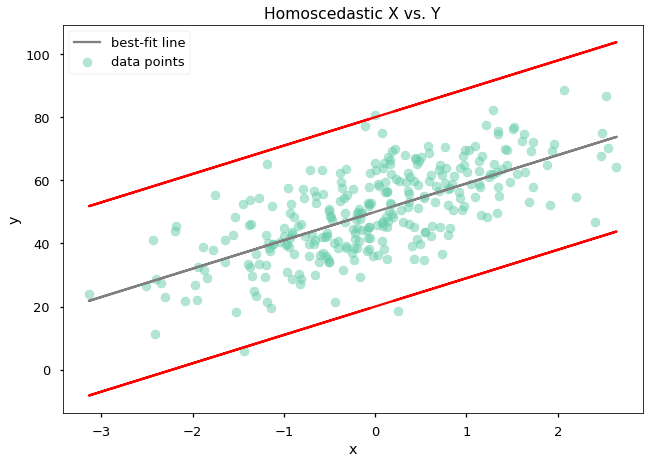

In [309]:
# testing for uniform variance because the overall model percentage increase was very negligible
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression
plt.style.use('seaborn-talk')

#Generate synthetic regression with predetermined gaussian noise
scale = 10
x_multiple3, y, coef = make_regression(
    n_samples=300, n_features=1, coef=True, noise=scale, random_state=8
)
y += 50

#We know the fit line because we generated the data (no need to model)
fit_line_generated = coef * x_multiple3.flatten() + 50

# We set the scale of the normal distribution, so we know that 99% of the
# points should be captured by these lines (empirical rule)
top_line = fit_line_generated - 3 * scale
bottom_line = fit_line_generated + 3 * scale

# Plot data and lines
fig, ax = plt.subplots()
ax.scatter(x_multiple3, y, color="mediumaquamarine", alpha=0.5, label="data points")
ax.plot(x_multiple3, fit_line_generated, color="gray", label="best-fit line")
ax.plot(x_multiple3, top_line, color="red")
ax.plot(x_multiple3, bottom_line, color="red")

# Customize labels
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Homoscedastic X vs. Y")
ax.legend();

In [310]:
# alternatively we can use 
from statsmodels.stats.diagnostic import het_goldfeldquandt

In [311]:
# testing for homoscedasticity
het_goldfeldquandt(y,x_multiple3, alternative='two-sided')

(1.064941143291257, 0.7014676435876456, 'two-sided')

Since the p value = 0.70 > 0.05,so we reject null and consider our data has homogenous variance,therefore our model obtained above is correct.

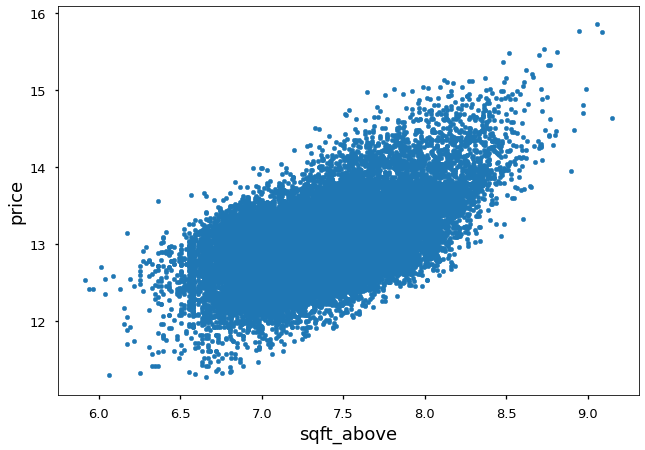

In [312]:
# checking for linearity
new_data_norm.plot.scatter(x='sqft_above', y='price')
plt.xlabel('sqft_above', fontsize=18)
plt.ylabel('price', fontsize=18)
plt.show()

##### we are adding a new explanatory variable because R-squared is not higher enough to indicate our model is reliable

In [313]:
# adding more independent variables
x_multiple4 = new_data_norm[["sqft_living","sqft_living15","sqft_above","sqft_lot","sqft_lot15"]]
x_multiple4.head()

,sqft_living,sqft_living15,sqft_above,sqft_lot,sqft_lot15
0,7.073270,7.200425,7.073270,8.639411,8.639411
1,7.851661,7.432484,7.682482,8.887653,8.941022
2,6.646391,7.908387,6.646391,9.210340,8.994917
3,7.580700,7.215240,6.956545,8.517193,8.517193
4,7.426549,7.495542,7.426549,8.997147,8.923058


In [314]:
#replace all infs and empty cells with NaN and then fill all NaNs with a 0 value
new_data_norm['price']= new_data_norm['price'].replace([np.inf, -np.inf],np.nan)
new_data_norm = new_data_norm.replace(r'\s+', np.nan, regex=True).replace('', np.nan)
new_data_norm.fillna(value=0, axis=1,inplace=True)

In [315]:
# Check shape of variables to confirm they are of the same size
print(y.shape)
print(y.shape)
print(x_multiple4["sqft_living"].shape)
print(x_multiple4["sqft_living15"].shape)
print(x_multiple4["sqft_above"].shape)
print(x_multiple4["sqft_lot"].shape)

(300,)
(300,)
(21597,)
(21597,)
(21597,)
(21597,)


In [316]:
model4 = sm.OLS(new_data_norm["price"],sm.add_constant(x_multiple4))

In [317]:
model4_fit = model4.fit()
print(model4_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     4242.
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:45:10   Log-Likelihood:                -9402.2
No. Observations:               21597   AIC:                         1.882e+04
Df Residuals:                   21591   BIC:                         1.886e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.6954      0.059     96.111

In [361]:
x_multiple5 = new_data_norm[["sqft_living","sqft_living15","sqft_above","sqft_lot","sqft_lot"]]

In [362]:
model_5 = sm.OLS(new_data_norm["price"],sm.add_constant(x_multiple5))
model_fit = model_5.fit()

In [360]:
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     5269.
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        14:09:20   Log-Likelihood:                -9437.3
No. Observations:               21597   AIC:                         1.888e+04
Df Residuals:                   21592   BIC:                         1.892e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.6396      0.059     95.621

### Preprocessing Categorical Variable(One Hot encoding)

In [354]:
x_iterated = data[["condition"]].copy()
x_iterated.sample(10,random_state = 1)

,condition
16729,Average
10996,Average
12089,Average
554,Very Good
16075,Very Good
17962,Good
13,Good
4960,Average
16928,Poor
3780,Average


In [355]:
x_iterated2 = pd.get_dummies(x_iterated, columns= ["condition"])
x_iterated2

,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,1
4,1,0,0,0,0
...,...,...,...,...,...
21592,1,0,0,0,0
21593,1,0,0,0,0
21594,1,0,0,0,0
21595,1,0,0,0,0


In [356]:
data["condition"].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [ ]:
y = b0 + b1+ b2x2+ b3x3 +b4x4 + b5x5 +b6x6

In [431]:
# perfoming join to get final predicting modelling
joined_data = new_data_norm.join(x_iterated2)
joined_data

,price,sqft_living,sqft_living15,sqft_above,sqft_lot,sqft_lot15,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good
0,12.309982,7.073270,7.200425,7.073270,8.639411,8.639411,1,0,0,0,0
1,13.195614,7.851661,7.432484,7.682482,8.887653,8.941022,1,0,0,0,0
2,12.100712,6.646391,7.908387,6.646391,9.210340,8.994917,1,0,0,0,0
3,13.311329,7.580700,7.215240,6.956545,8.517193,8.517193,0,0,0,0,1
4,13.142166,7.426549,7.495542,7.426549,8.997147,8.923058,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
21592,12.793859,7.333023,7.333023,7.333023,7.030857,7.319202,1,0,0,0,0
21593,12.899220,7.745003,7.512071,7.745003,8.667852,8.881836,1,0,0,0,0
21594,12.904459,6.927558,6.927558,6.927558,7.207860,7.604396,1,0,0,0,0
21595,12.899220,7.377759,7.251345,7.377759,7.778211,7.160069,1,0,0,0,0


In [426]:
# dropping mpg because this is our target, then only selecting numeric features
X_all = joined_data.drop(["price","condition_Average"], axis=1)
X_all

,sqft_living,sqft_living15,sqft_above,sqft_lot,sqft_lot15,condition_Fair,condition_Good,condition_Poor,condition_Very Good
0,7.073270,7.200425,7.073270,8.639411,8.639411,0,0,0,0
1,7.851661,7.432484,7.682482,8.887653,8.941022,0,0,0,0
2,6.646391,7.908387,6.646391,9.210340,8.994917,0,0,0,0
3,7.580700,7.215240,6.956545,8.517193,8.517193,0,0,0,1
4,7.426549,7.495542,7.426549,8.997147,8.923058,0,0,0,0
...,...,...,...,...,...,...,...,...,...
21592,7.333023,7.333023,7.333023,7.030857,7.319202,0,0,0,0
21593,7.745003,7.512071,7.745003,8.667852,8.881836,0,0,0,0
21594,6.927558,6.927558,6.927558,7.207860,7.604396,0,0,0,0
21595,7.377759,7.251345,7.377759,7.778211,7.160069,0,0,0,0


In [430]:
# modelling
model5 = sm.OLS(new_data_norm["price"],sm.add_constant(X_all))
model5_fit = model5.fit()
print(model5_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     2455.
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        19:45:09   Log-Likelihood:                -9181.8
No. Observations:               21597   AIC:                         1.838e+04
Df Residuals:                   21587   BIC:                         1.846e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   5.5706    

### Interpretation of Results

The model is statistically significant with all the coefficients, this is because they have a p value less than the level of siginificance except sqft_above and sqft_lot.
The model has  R_squared of 50.6%, indicating that our dependent variables is explained 50.6% of the variance explained by the model.

sqft_living and sqft_living15 affect the model positively, that is  when there is a one unit percentage increase holding all the other explanatory variables constant where sqft_living will make price to change by 0.6317% holding all other explanatory variable constant and sqft_living15 will make the price to change by 0.4729% and all the other explanatory variables makes price to decrease because they have a negative coeffients.

Interpretation of condition_fair, condition_Good, condition_poor and  condition_very Good they are not same with the one above because their effect are comparable to condition_Average. Typically condition condition_poor and condition_fair are likely to have a negative effect on the prediction of prices because condition_Average is higher than the two,thus reason for having negative coefficients,condition_Good and condition_Very Good have a positive impact on condition average making it to influence price positively.

The effect change of condition_Very Good is  0.1869 on condition_Average indicating it has more effect and the effect change of  condition_Good on condition_Average is 0.0611 indicating it weighs more higher effect on price.
The effect of condition_poor is -0.1361 on condition_Average thus it indicates it has a reducing effect on pricing of houses and the effect of condition_Fair is -0.1173 indicating it has a negative impact on condition_Average.

## Final prediction model is:

price = 5.5706 + 0.6317sqft_living+ 0.4729sqft_living15 - 0.0736sqft_lot15 - 0.1173condition_Fair + 0.0611condition_Good - 0.1361condition_Poor	+ 0.1869condition_Very Good